# 데이터시각화 시험공부3
> DV 중간고사 정리3

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "데이터시각화"]

# 주로쓰는 패키지들

In [3]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
import cv2 as cv
from scipy import stats

______

# query를 이용한 행의 선택

In [ ]:
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))
df

#### A>0 and B<0 인 행을 선택 

In [4]:
df.query('A>0 & B<0') #방법 1

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


In [5]:
df.query('A>0 and B<0') # 방법 2

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


#### A<B<C 인 행을 선택

In [6]:
df.query('A<B<C') # 방법 1

,A,B,C,D
9,-1.117310,0.234416,1.659802,0.742044
13,-1.142518,-0.349343,-0.208894,0.586623


#### A>mean(A) 인 행을 선택

In [7]:
df.A.mean()  # A의 평균 구하기

-0.018839420539994597

In [8]:
df.query('A>-0.018839420539994597') #방법 1 진짜 평균을 넣어줌

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


_______

In [9]:
meanA=df.A.mean()
meanA

-0.018839420539994597

In [10]:
df.query('A> @meanA') #방법2 외부에 지정된 함수를 쓰기위해 @ 를 붙여줌

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


#### A>mean(A) 이고, A<0.8 인 것을 선택 

In [11]:
df.query(' A> @meanA and A<0.8') # 방법1

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


In [2]:
df.query(' A> @meanA'
         ' and A<0.8')    # 방법 2, '바로 옆 띄어쓰기가 진짜 중요

NameError: name 'df' is not defined

#### 단순인덱싱 

`-` 0, 3:5, 9:11 에 해당하는 row를 뽑고싶다. $\to$ 칼럼이름을 `index`로 받아서 사용한다. 

In [15]:
df.query('index==0 or 3<=index <=5  or 9<=index <=11')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


`-` 응용사례1

In [16]:
df.query('index==0 or index ==[8,9,10]')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455


`-` 응용사례2 

In [17]:
i1= np.arange(3)
i1

array([0, 1, 2])

In [18]:
df.query('index in @i1  or index==5')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
5,-1.100619,1.144724,0.901591,0.502494


# 시계열자료에서 특히 유용한 query

In [4]:
df2=pd.DataFrame(np.random.normal(size=(10,4)), columns=list('ABCD'), index=pd.date_range('20201226',periods=10))

In [5]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" ')

,A,B,C,D
2020-12-27,0.508051,0.622423,-2.032805,-0.317645
2020-12-28,0.345579,1.451286,0.173676,0.064197
2020-12-29,1.002694,-0.912398,-1.000506,-1.645377
2020-12-30,2.361380,0.991708,-0.550669,-0.235089
2020-12-31,0.495589,-2.142331,-0.541152,0.103671
2021-01-01,-1.143330,-0.482436,-0.486146,1.461083
2021-01-02,0.327084,-0.722183,0.665579,-1.270762
2021-01-03,1.809573,0.100709,0.802929,0.849023


In [6]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" '
    ' and A+B < C')

,A,B,C,D
2020-12-31,0.495589,-2.142331,-0.541152,0.103671
2021-01-01,-1.143330,-0.482436,-0.486146,1.461083
2021-01-02,0.327084,-0.722183,0.665579,-1.270762


_____________________

# groupby 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')

df #항공 정보

df.columns #열이름 나열

- https://github.com/PacktPublishing/Pandas-Cookbook/blob/master/data/descriptions/flights_description.csv

> 칼럼 설명

`-` 데이터프레임을 여러개의 서브데이터프레임으로 나누는 기능 

`-` 단독으로 쓸 이유는 별로 없다. $\to$ 그룹을 나누고 어떠한 "연산"을 하기 위함

In [3]:
df.groupby(by='AIRLINE')

- 데이터프레임을 각 항공사 별로 나눔

`-` 확인

In [4]:
grouped_df = df.groupby(by='AIRLINE')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')

grouped_df.groups

- 너무 보기 힘듬 

`-` 보기좋은 형태로 확인

In [9]:
list(grouped_df.groups)  #항공사안 카테고리의 리스트 출력

['AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN']

In [10]:
grouped_df.get_group('AA') #항공사별로 나눈 것의 특정 카테고리를 df로 보기

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


for g in grouped_df.groups:

    print(g)
    
    display(grouped_df.get_group(g))  
    
    $\to$ 리스트 카테고리들 전부를 확인

### AIRLINE을 기준으로 데이터프레임을 나누고 $\to$ ARR_DELAY에 mean함수를 적용: (AIRLINE $\to$ {ARR_DELAY: mean}) 

`-` 방법1 (기본, agg와 딕셔너리 이용)

In [11]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법2 ($\star\star\star$)

In [12]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':np.mean})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법3 , 나눠진 df에서 ARR_DELAY 뽑고, 평균함수적용

In [13]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg('mean')

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법4 ($\star$)

In [14]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(np.mean)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법5

In [15]:
df.groupby(by='AIRLINE')['ARR_DELAY'].mean()

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법2와 방법4는 사용자정의 함수를 쓸 수 있다는 장점이 있음 

`-` 방법6 

In [16]:
def f(x): return -np.mean(x)  #사용자정의함수 지정

In [17]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':f})

,ARR_DELAY
AIRLINE,
AA,-5.542661
AS,0.833333
B6,-8.692593
DL,-0.339691
EV,-7.034580
F9,-13.630651
HA,-4.972973
MQ,-6.860591
NK,-18.436070


`-` 방법7

In [18]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':lambda x: -np.mean(x)})

,ARR_DELAY
AIRLINE,
AA,-5.542661
AS,0.833333
B6,-8.692593
DL,-0.339691
EV,-7.034580
F9,-13.630651
HA,-4.972973
MQ,-6.860591
NK,-18.436070


`-` 방법8

In [19]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(lambda x: -np.mean(x))

AIRLINE
AA    -5.542661
AS     0.833333
B6    -8.692593
DL    -0.339691
EV    -7.034580
F9   -13.630651
HA    -4.972973
MQ    -6.860591
NK   -18.436070
OO    -7.593463
UA    -7.765755
US    -1.681105
VX    -5.348884
WN    -6.397353
Name: ARR_DELAY, dtype: float64

### 입력이 여러개인 사용자 정의 함수의 사용 

In [21]:
def f(x,y): return np.mean(x)**y 

`-` 방법1

In [22]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(f,2)

AIRLINE
AA     30.721086
AS      0.694444
B6     75.561166
DL      0.115390
EV     49.485310
F9    185.794656
HA     24.730460
MQ     47.067715
NK    339.888677
OO     57.660681
UA     60.306954
US      2.826113
VX     28.610564
WN     40.926120
Name: ARR_DELAY, dtype: float64

`-` 방법2

In [23]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY': lambda x: f(x,2)})

,ARR_DELAY
AIRLINE,
AA,30.721086
AS,0.694444
B6,75.561166
DL,0.115390
EV,49.485310
F9,185.794656
HA,24.730460
MQ,47.067715
NK,339.888677


# 활용

### AIRLINE,WEEKDAY  $\to$  {CANCELLED: sum}

`-` 방법1~5

In [25]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':'sum'})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

In [26]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':np.sum})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

In [27]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg('sum')

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [28]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg(np.sum)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [29]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].sum()

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

#### AIRLINE,WEEKDAY  $\to$ {CANCELLED: sum, mean} , {DIVERTED: sum, mean} 

`-` 방법 1~4 (5번은 쓸 수 없다) 

In [30]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean'],'DIVERTED':['sum','mean']})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [31]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':[np.sum,np.mean],'DIVERTED':[np.sum,np.mean]})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [39]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg(['sum','mean']) #컬럼을 리스트로 전달

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [33]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg([np.sum,np.mean])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [34]:
# df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED','DIVERTED'].sum() ?? 

#### AIRLINE,WEEKDAY  $\to$ {CANCELLED: sum, mean, size} , {AIR_TIME: mean,var}

In [40]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean','size'],'AIR_TIME':['mean','var']})
#딕셔너리 활용

CANCELLED                    AIR_TIME             
                      sum      mean  size        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

In [36]:
df.groupby(by=['AIRLINE','WEEKDAY'])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,lambda x: np.std(x,ddof=1)**2]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean   <lambda_0>
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

### grouping by continuous variable  연속형변수 그룹화

In [37]:
df

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


`-` 목표: DIST를 적당한 구간으로 나누어 카테고리화 하고 그것을 바탕으로 groupby를 수행하자. 

<AxesSubplot:>

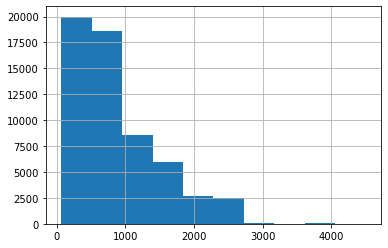

In [41]:
df.DIST.hist() #앞쪽에 몰려있음

In [43]:
df.DIST.describe()  #대략적 통계값 산출

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

`-` 구간을 아래와 같이 설정한다. 

In [46]:
bins=[-np.inf, 400, 700, 1200, np.inf]   #  -무한대 ~400 ~700 ~1200 ~무한대

`-` pd.cut()을 이용하여 각 구간의 observation을 카테고리화(mapping) 하자. 

In [48]:
cuts=pd.cut(df.DIST,bins=bins)   #(적용할 칼럼, bins=구간)
cuts

0         (400.0, 700.0]
1          (1200.0, inf]
2         (400.0, 700.0]
3        (700.0, 1200.0]
4          (1200.0, inf]
              ...       
58487      (1200.0, inf]
58488     (400.0, 700.0]
58489      (-inf, 400.0]
58490    (700.0, 1200.0]
58491     (400.0, 700.0]
Name: DIST, Length: 58492, dtype: category
Categories (4, interval[float64]): [(-inf, 400.0] < (400.0, 700.0] < (700.0, 1200.0] < (1200.0, inf]]

`-` cuts, AIRLINE $\to$ {DIVERTED: sum}

In [50]:
df.groupby([cuts,'AIRLINE']).agg({'DIVERTED':sum})  #구분별 항공사 diverted합 산출

DIVERTED
DIST            AIRLINE          
(-inf, 400.0]   AA              0
                AS              0
                B6              0
                DL              1
                EV              3
                F9              0
                HA              0
                MQ              0
                NK              0
                OO              5
                UA              2
                US              0
                VX              0
                WN              1
(400.0, 700.0]  AA              3
                AS              0
                B6              0
                DL             12
                EV              8
                F9              1
                HA              0
                MQ              4
                NK              1
                OO              7
                UA              1
                US              0
                VX              0
                WN              2
(700.0, 1200.0] AA             10
                AS              0
                B6              1
                DL              6
                EV              4
                F9              0
                HA              0
                MQ              1
                NK              1
                OO              5
                UA              4
                US              0
                VX              0
                WN              4
(1200.0, inf]   AA             13
                AS              0
                B6              1
                DL              5
                EV              0
                F9              1
                HA              1
                MQ              0
                NK              3
                OO              4
                UA             12
                US              1
                VX              1
                WN              8

`-` 아래와 비교해보자. 

In [54]:
df.groupby(['AIRLINE']).agg({'DIVERTED':sum})

,DIVERTED
AIRLINE,
AA,26
AS,0
B6,2
DL,24
EV,15
F9,2
HA,1
MQ,5
NK,5


`-` cuts을 이용하여 추가그룹핑을 하면 조금 다른 특징들을 데이터에서 발견할 수 있다. 
- AA항공사와 DL항공사는 모두 비슷한 우회횟수를 가지고 있음. 
- AA항공사는 700회이상의 구간에서 우회를 많이하고 DL항공사는 400~700사이에서 우회를 많이 한다. (패턴이 다름) 상세한 패턴 확인 가능

`-` 구간이름에 label을 붙이는 방법  labels=[] 이용

In [52]:
bins

[-inf, 400, 700, 1200, inf]

In [53]:
cuts2=pd.cut(df.DIST,bins=bins,labels=['Q1','Q2','Q3','Q4'])
cuts2

0        Q2
1        Q4
2        Q2
3        Q3
4        Q4
         ..
58487    Q4
58488    Q2
58489    Q1
58490    Q3
58491    Q2
Name: DIST, Length: 58492, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [55]:
df.groupby(by=[cuts2,'AIRLINE']).agg({'DIVERTED':sum})

DIVERTED
DIST AIRLINE          
Q1   AA              0
     AS              0
     B6              0
     DL              1
     EV              3
     F9              0
     HA              0
     MQ              0
     NK              0
     OO              5
     UA              2
     US              0
     VX              0
     WN              1
Q2   AA              3
     AS              0
     B6              0
     DL             12
     EV              8
     F9              1
     HA              0
     MQ              4
     NK              1
     OO              7
     UA              1
     US              0
     VX              0
     WN              2
Q3   AA             10
     AS              0
     B6              1
     DL              6
     EV              4
     F9              0
     HA              0
     MQ              1
     NK              1
     OO              5
     UA              4
     US              0
     VX              0
     WN              4
Q4   AA             13
     AS              0
     B6              1
     DL              5
     EV              0
     F9              1
     HA              1
     MQ              0
     NK              3
     OO              4
     UA             12
     US              1
     VX              1
     WN              8

In [56]:
df.groupby(cuts2).agg({'DIVERTED':len})

,DIVERTED
DIST,
Q1,15027
Q2,14697
Q3,14417
Q4,14351


______________

# tidy data

> ggplot으로 그림그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료

- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

tidy data는 보통 세로로 긴 데이터를 가짐

### 예제 tidy data

#### 풀이1: stack + reset_index  

`-` 문제의 깃헙주소로 들어가서 데이터를 관찰 $\to$ 좌측상단이 비워져있음(Unnamed: 0) $\to$ `index_col=0` 옵션을 사용 

In [4]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df=pd.read_csv(url,index_col=0)
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


#### 데이터변형

In [5]:
df.stack() # 우리가 원하는 형태가 아님
#멀티인덱스로 되어있어서 tidy가 아님, 칼럼도 없음

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [6]:
df.stack().reset_index() # 인덱스가 0~8이고 범주형변수로 나뉘어짐

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [7]:
df.stack().reset_index().rename(columns={'level_0':'group1','level_1':'group2',0:'X'})
#tidy data! 인덱스도 쉽고, 범주로 나뉘어서 query,groupby 도 쉬워짐 

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


#### 풀이2: melt(id_vars=??)

`-` `index_col=0` 옵션을 몰랐다면 어떻게 tidydata로 만들까?

In [8]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df2=pd.read_csv(url)
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [9]:
df2.rename(columns={'Unnamed: 0':'group1'})
#Unnamed: 0 이 너무 불편해서 그룹1로 바꿈

,group1,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [10]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt()
#세로로 바뀌었지만 그룹1이 뭔가 이상함

,variable,value
0,group1,Texas
1,group1,Arizona
2,group1,Florida
3,Apple,12
4,Apple,9
5,Apple,0
6,Orange,10
7,Orange,7
8,Orange,14
9,Banana,40


In [41]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')
# 수정된 melt형태, 그룹1은 열로 빼고 싶다.

,group1,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [44]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')\
.rename(columns={'variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 풀이3  reset_index + melt

In [67]:
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [68]:
df.reset_index()

,index,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [69]:
df.reset_index().melt(id_vars='index')
#melt는 사용하나 index칼럼은 칼럼의 범주로 넣어줌

,index,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [70]:
df.reset_index().melt(id_vars='index')\
.rename(columns={'index':'group1','variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 풀이4  set_index + stack + reset_index + rename

In [78]:
df2.set_index('Unnamed: 0')

,Apple,Orange,Banana
Unnamed: 0,,,
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [79]:
df2.set_index('Unnamed: 0').stack()

Unnamed: 0        
Texas       Apple      12
            Orange     10
            Banana     40
Arizona     Apple       9
            Orange      7
            Banana     12
Florida     Apple       0
            Orange     14
            Banana    190
dtype: int64

In [80]:
df2.set_index('Unnamed: 0').stack().reset_index()

,Unnamed: 0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [81]:
df2.set_index('Unnamed: 0').stack().reset_index()\
.rename(columns={'Unnamed: 0':'group1','level_1':'group2',0:'X'})

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


____

# Barplot + 해들리위컴의 그래프레이어 

#### 기본사용법

In [85]:
g=['A']*100+['B']*200 
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)
df=pd.DataFrame({'g':g,'y':y})
df

,g,y
0,A,-1.594055
1,A,1.225490
2,A,2.223234
3,A,1.842460
4,A,1.624541
...,...,...
295,B,3.011681
296,B,3.558141
297,B,4.348230
298,B,3.966407


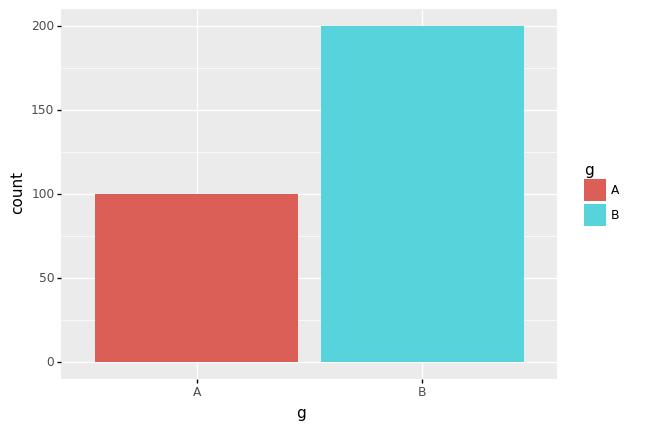

<ggplot: (8726962443840)>

In [89]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌
#안쪽을 채우려면 fill= 이용, 직관적이지는 않다.

In [ ]:
df.groupby(by='g').count()
# = df.groupby(by='g').agg({'y':len})